In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r '/content/drive/MyDrive/solar power/Solar_Train.xlsx' '/content'
!cp -r '/content/drive/MyDrive/solar power/Solar_Test.xlsx' '/content'

In [ ]:
!cp -r '/content/drive/MyDrive/solar power/2016.xlsx' '/content'
!cp -r '/content/drive/MyDrive/solar power/2017.xlsx' '/content'
!cp -r '/content/drive/MyDrive/solar power/2018.xlsx' '/content'
!cp -r '/content/drive/MyDrive/solar power/2019.xlsx' '/content'
!cp -r '/content/drive/MyDrive/solar power/2020.xlsx' '/content'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_excel('/content/Solar_Train.xlsx')
val = pd.read_excel('/content/Solar_Test.xlsx')

In [ ]:
train

,YEAR,Month,Day,Hour,Relative Humidity,Temperature,GHI,POWER,Pressure,Precipitable Water,Wind Direction,Wind Speed
0,2016,1,1,0,96.01,13.4,0,0.0,1016,1.8,42,0.8
1,2016,1,1,1,97.88,12.8,0,0.0,1017,1.8,37,0.6
2,2016,1,1,2,99.35,12.3,0,0.0,1018,1.8,43,0.8
3,2016,1,1,3,99.31,12.0,0,0.0,1018,1.7,72,0.5
4,2016,1,1,4,99.27,11.6,0,0.0,1018,1.8,110,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
35034,2019,12,31,19,73.00,19.2,0,0.0,1015,2.7,30,0.9
35035,2019,12,31,20,76.50,18.4,0,0.0,1015,2.7,30,1.0
35036,2019,12,31,21,78.34,17.8,0,0.0,1014,2.6,33,1.1
35037,2019,12,31,22,79.94,17.2,0,0.0,1014,2.6,35,1.2


In [ ]:
val

,YEAR,Month,Day,Hour,Relative Humidity,Temperature,GHI,POWER,Pressure,Precipitable Water,Wind Direction,Wind Speed
0,2020,1,1,0,66.11,14.4,0,0.0,1016,2.6,36,1.4
1,2020,1,1,1,67.22,13.9,0,0.0,1017,2.6,34,1.6
2,2020,1,1,2,68.38,13.4,0,0.0,1018,2.7,34,1.4
3,2020,1,1,3,69.57,12.9,0,0.0,1019,2.8,37,1.3
4,2020,1,1,4,71.78,12.2,0,0.0,1019,2.9,42,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2020,12,31,19,72.97,18.6,0,0.0,1012,1.5,53,0.8
8780,2020,12,31,20,73.57,18.3,0,0.0,1012,1.5,49,0.8
8781,2020,12,31,21,76.72,17.5,0,0.0,1011,1.4,48,0.8
8782,2020,12,31,22,80.73,16.5,0,0.0,1012,1.4,47,0.8


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35039 entries, 0 to 35038
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEAR                35039 non-null  int64  
 1   Month               35039 non-null  int64  
 2   Day                 35039 non-null  int64  
 3   Hour                35039 non-null  int64  
 4   Relative Humidity   35039 non-null  float64
 5   Temperature         35039 non-null  float64
 6   GHI                 35039 non-null  int64  
 7   POWER               35039 non-null  float64
 8   Pressure            35039 non-null  int64  
 9   Precipitable Water  35039 non-null  float64
 10  Wind Direction      35039 non-null  int64  
 11  Wind Speed          35039 non-null  float64
dtypes: float64(5), int64(7)
memory usage: 3.2 MB


In [ ]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEAR                8784 non-null   int64  
 1   Month               8784 non-null   int64  
 2   Day                 8784 non-null   int64  
 3   Hour                8784 non-null   int64  
 4   Relative Humidity   8784 non-null   float64
 5   Temperature         8784 non-null   float64
 6   GHI                 8784 non-null   int64  
 7   POWER               8784 non-null   float64
 8   Pressure            8784 non-null   int64  
 9   Precipitable Water  8784 non-null   float64
 10  Wind Direction      8784 non-null   int64  
 11  Wind Speed          8784 non-null   float64
dtypes: float64(5), int64(7)
memory usage: 823.6 KB


In [ ]:
years = ['2016', '2017', '2018', '2019','2020']
correlations_data = {}

In [ ]:
for year in years:
    df = pd.read_excel(f'{year}.xlsx')
    df.drop(['YEAR','Month','Day','Hour'], axis = 1, inplace = True)
    correlations_data[year] = df.corr()['POWER'].drop('POWER')

correlations_df = pd.DataFrame(correlations_data)

correlations_df['average'] = correlations_df.mean(axis=1)

correlations_df.reset_index(inplace=True)
correlations_df.rename(columns={'index': 'features'}, inplace=True)

correlations_df.to_csv('yearly_correlations.csv', index=False)
correlations_df

,features,2016,2017,2018,2019,2020,average
0,Relative Humidity,-0.696131,-0.721987,-0.785840,-0.720569,-0.746759,-0.734257
1,Temperature,0.583627,0.560062,0.543508,0.572265,0.541395,0.560171
2,GHI,0.999874,0.999880,0.999824,0.999821,0.999551,0.999790
3,Pressure,-0.188638,-0.123068,-0.134173,-0.139825,-0.117341,-0.140609
4,Precipitable Water,0.020535,-0.026510,0.008029,-0.007535,-0.030179,-0.007132
5,Wind Direction,0.357987,0.397988,0.449671,0.431247,0.414374,0.410253
6,Wind Speed,0.031071,-0.121357,-0.054771,-0.094988,-0.080441,-0.064097


In [ ]:
train.drop(['YEAR','Month','Day','Hour','Pressure','Precipitable Water','Wind Direction','Wind Speed'], axis=1,inplace= True)
val.drop(['YEAR','Month','Day','Hour','Pressure','Precipitable Water','Wind Direction','Wind Speed'], axis=1,inplace= True)

In [ ]:
train.head(10)

,Relative Humidity,Temperature,GHI,POWER
0,96.01,13.4,0,0.000000
1,97.88,12.8,0,0.000000
2,99.35,12.3,0,0.000000
3,99.31,12.0,0,0.000000
4,99.27,11.6,0,0.000000
5,98.68,11.3,0,0.000000
6,81.60,13.1,0,0.000000
7,80.77,15.1,39,16.825926
8,68.05,18.4,218,92.858408
9,59.49,21.6,406,170.781464


In [ ]:
val.head(10)

,Relative Humidity,Temperature,GHI,POWER
0,66.11,14.4,0,0.000000
1,67.22,13.9,0,0.000000
2,68.38,13.4,0,0.000000
3,69.57,12.9,0,0.000000
4,71.78,12.2,0,0.000000
5,72.51,11.8,0,0.000000
6,83.38,15.1,0,0.000000
7,80.47,16.0,6,2.579640
8,76.61,17.6,24,10.254816
9,71.86,19.6,139,58.930996


In [ ]:
train.isna().sum()

Relative Humidity    0
Temperature          0
GHI                  0
POWER                0
dtype: int64

In [ ]:
val.isna().sum()

Relative Humidity    0
Temperature          0
GHI                  0
POWER                0
dtype: int64

**Applying Boxcox transformation to deal with skewness**

In [ ]:
from scipy.stats import boxcox, skew

**Training Set**

In [ ]:
for col in train.columns[:3]:
    skewness = skew(train[col])
    print(f"Skewness of '{col}': {skewness}")

Skewness of 'Relative Humidity': -0.8459803939671816
Skewness of 'Temperature': -0.5738889528740412
Skewness of 'GHI': 1.1230940938138945


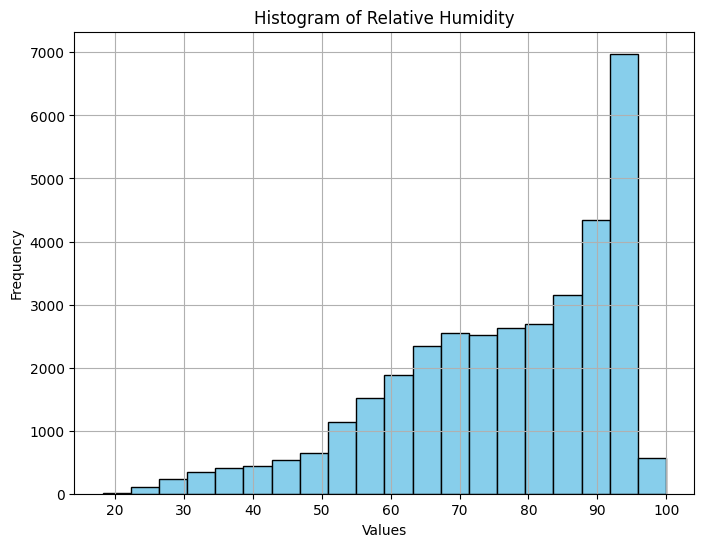

Skewness of 'Relative Humidity': -0.8459803939671816



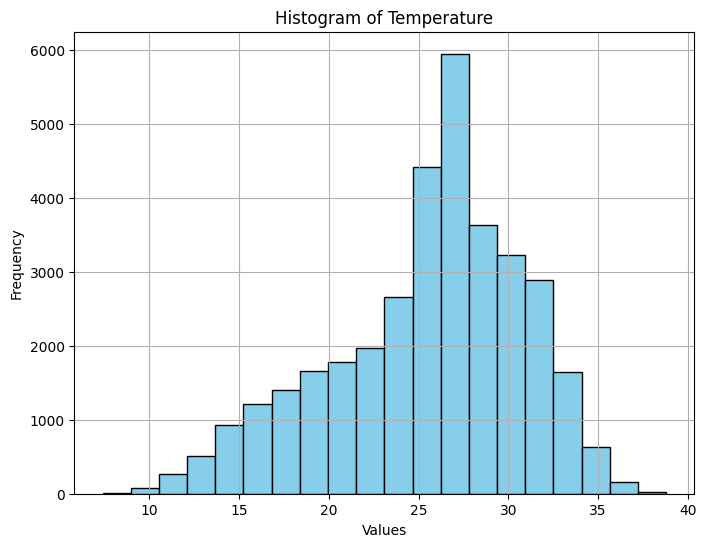

Skewness of 'Temperature': -0.5738889528740412



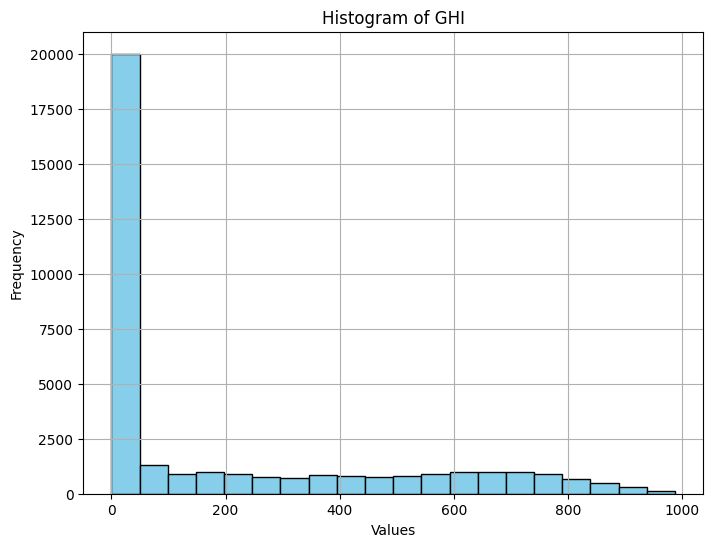

Skewness of 'GHI': 1.1230940938138945



In [ ]:
columns = train.columns[:-1]

for col in columns:
    plt.figure(figsize=(8, 6))
    plt.hist(train[col], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.grid(True)
    plt.show()

    skewness = skew(train[col])
    print(f"Skewness of '{col}': {skewness}\n")

In [ ]:
transformed_train = train.copy()

for column in train.columns[:-1]:
    data = train[train[column] > 0][column]
    transformed_data, optimal_lambda = boxcox(data)
    print(f"Column: {column}, Optimal Lambda: {optimal_lambda}")
    print(f"Transformed Data: {transformed_data}")

    transformed_train.loc[train[column] > 0, column] = transformed_data

for column in transformed_train.columns[:-1]:
    column_data = transformed_train[column]
    column_skewness = skew(column_data)
    print(f"Column: {column}, Skewness: {column_skewness}")

Column: Relative Humidity, Optimal Lambda: 2.488442737809697
Transformed Data: [34430.89426746 36123.96783265 37489.14873666 ... 20755.51879748
 21826.49339035 22845.97168403]
Column: Temperature, Optimal Lambda: 1.9489644937447357
Transformed Data: [ 80.18872264  73.29585084  67.78088914 ... 139.83944152 130.76647741
 123.43135026]
Column: GHI, Optimal Lambda: 0.5575255770689395
Transformed Data: [12.03547624 34.30447415 49.26334777 ... 47.34153651 31.04832032
  6.32411947]
Column: Relative Humidity, Skewness: -0.2624083650576002
Column: Temperature, Skewness: -0.113925469288897
Column: GHI, Skewness: 0.7406172391448104


In [ ]:
for column in transformed_train.columns[:-1]:
    column_data = transformed_train[column]
    column_skewness = skew(column_data)
    print(f"Column: {column}, Skewness: {column_skewness}")

Column: Relative Humidity, Skewness: -0.2624083650576002
Column: Temperature, Skewness: -0.113925469288897
Column: GHI, Skewness: 0.7406172391448104


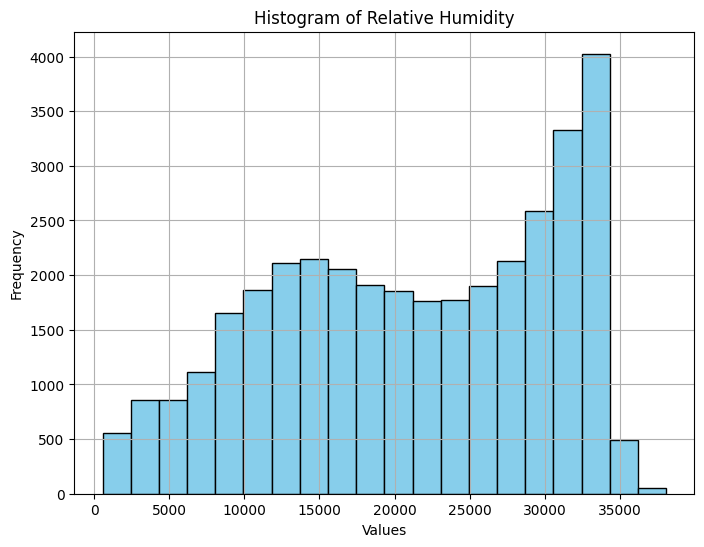

Skewness of 'Relative Humidity': -0.2624083650576002



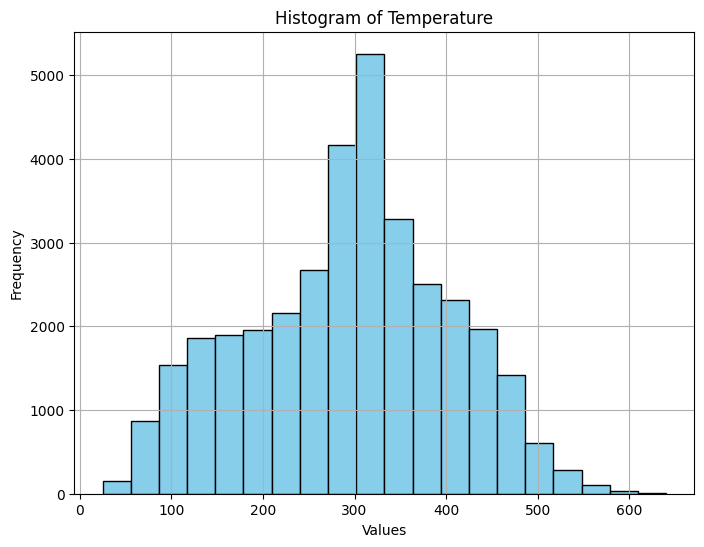

Skewness of 'Temperature': -0.113925469288897



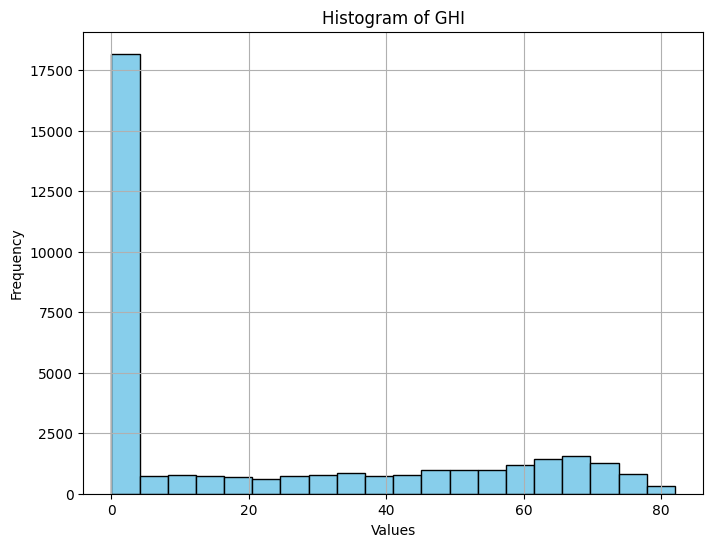

Skewness of 'GHI': 0.7406172391448104



In [ ]:
columns = transformed_train.columns[:-1]

for col in columns:
    plt.figure(figsize=(8, 6))
    plt.hist(transformed_train[col], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.grid(True)
    plt.show()

    skewness = skew(transformed_train[col])
    print(f"Skewness of '{col}': {skewness}\n")

**Validation Set**

In [ ]:
for col in val.columns[:3]:
    skewness = skew(val[col])
    print(f"Skewness of '{col}': {skewness}")

Skewness of 'Relative Humidity': -0.9441130798751064
Skewness of 'Temperature': -0.5615915059545478
Skewness of 'GHI': 1.1543109638646518


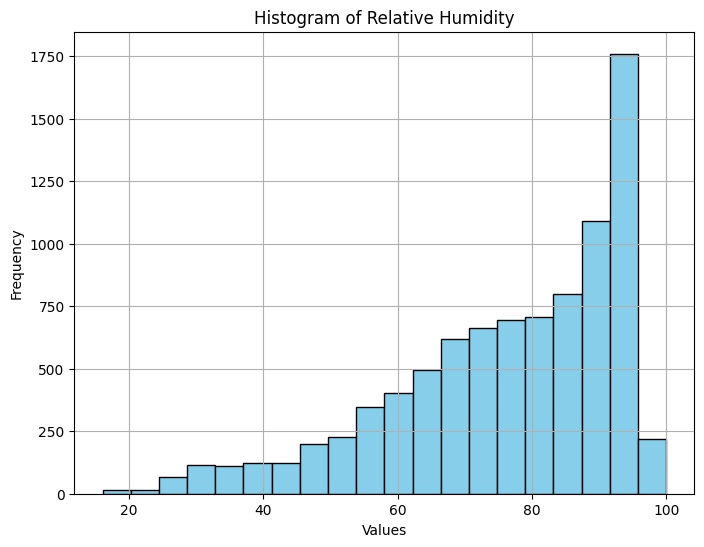

Skewness of 'Relative Humidity': -0.9441130798751064



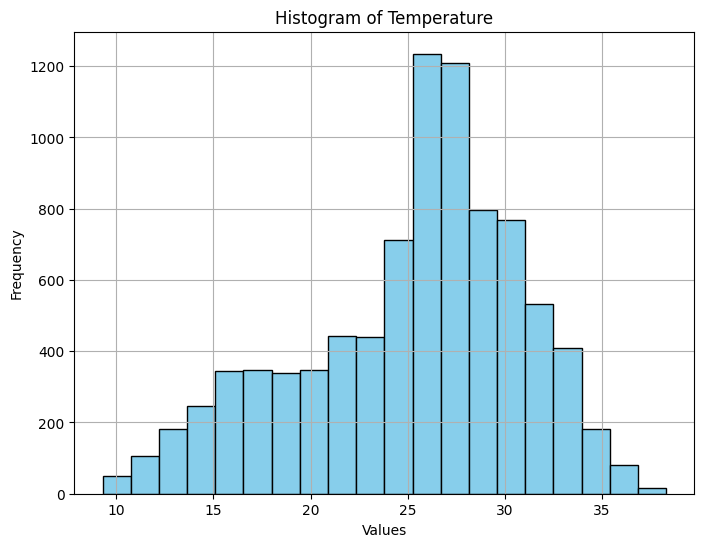

Skewness of 'Temperature': -0.5615915059545478



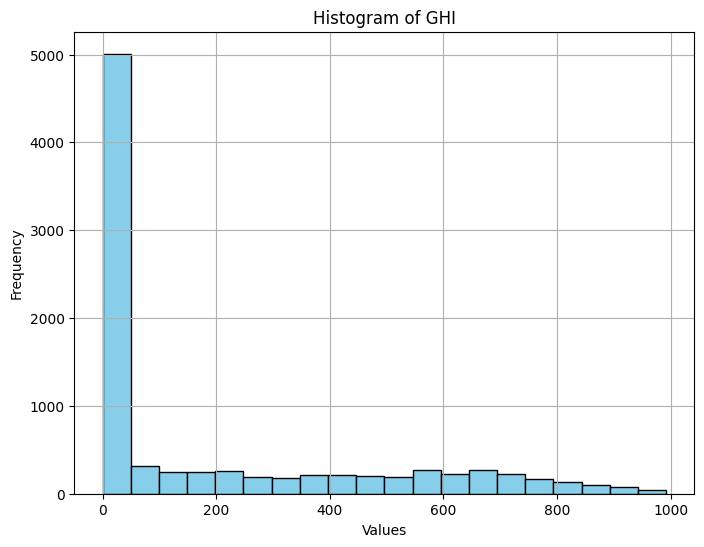

Skewness of 'GHI': 1.1543109638646518



In [ ]:
columns = val.columns[:-1]

for col in columns:
    plt.figure(figsize=(8, 6))
    plt.hist(val[col], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.grid(True)
    plt.show()

    skewness = skew(val[col])
    print(f"Skewness of '{col}': {skewness}\n")

In [ ]:
transformed_val = val.copy()

for column in val.columns[:-1]:
    data = val[val[column] > 0][column]
    transformed_data, optimal_lambda = boxcox(data)
    print(f"Column: {column}, Optimal Lambda: {optimal_lambda}")
    print(f"Transformed Data: {transformed_data[:5]}")

    transformed_val.loc[val[column] > 0, column] = transformed_data

for column in transformed_val.columns[:-1]:
    column_data = transformed_val[column]
    column_skewness = skew(column_data)
    print(f"Column: {column}, Skewness: {column_skewness}")

Column: Relative Humidity, Optimal Lambda: 2.5468742717577206
Transformed Data: [16981.42152879 17717.0659281  18506.18868766 19337.52436013
 20940.72898091]
Column: Temperature, Optimal Lambda: 1.8680814342756098
Transformed Data: [77.54107004 72.55317027 67.71863421 63.038205   56.74598624]
Column: GHI, Optimal Lambda: 0.5464690131650368
Transformed Data: [ 3.04165194  8.56154357 25.30480868 36.29666319 42.90490101]
Column: Relative Humidity, Skewness: -0.29649207778964604
Column: Temperature, Skewness: -0.12669272499126244
Column: GHI, Skewness: 0.7378874955508973


In [ ]:
for column in transformed_val.columns[:-1]:
    column_data = transformed_val[column]
    column_skewness = skew(column_data)
    print(f"Column: {column}, Skewness: {column_skewness}")

Column: Relative Humidity, Skewness: -0.29649207778964604
Column: Temperature, Skewness: -0.12669272499126244
Column: GHI, Skewness: 0.7378874955508973


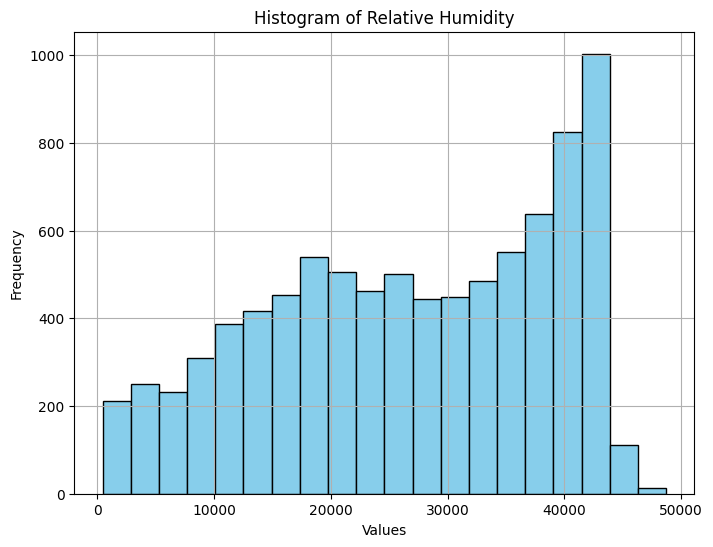

Skewness of 'Relative Humidity': -0.29649207778964604



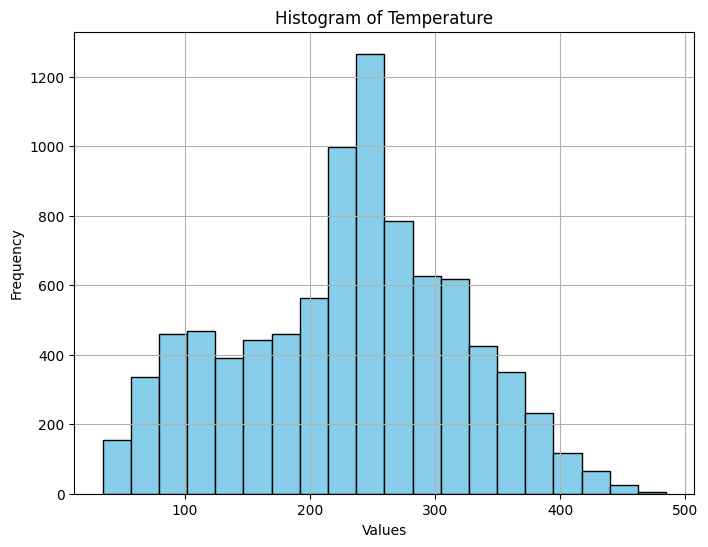

Skewness of 'Temperature': -0.12669272499126244



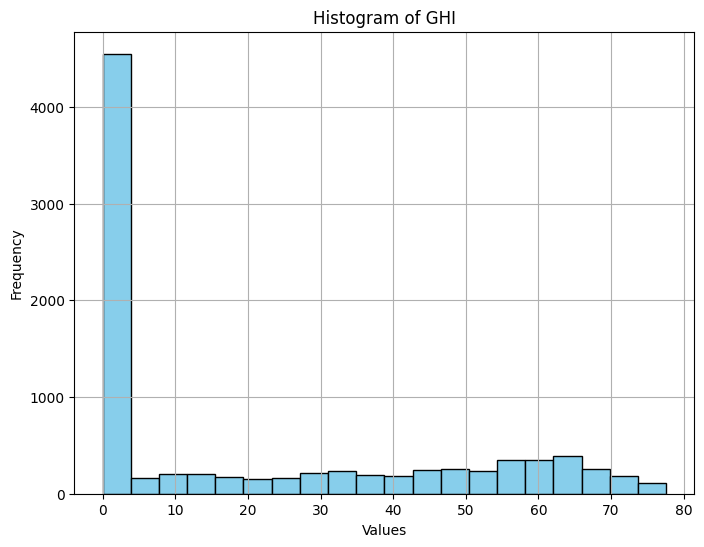

Skewness of 'GHI': 0.7378874955508973



In [ ]:
columns = transformed_val.columns[:-1]

for col in columns:
    plt.figure(figsize=(8, 6))
    plt.hist(transformed_val[col], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.grid(True)
    plt.show()

    skewness = skew(transformed_val[col])
    print(f"Skewness of '{col}': {skewness}\n")

In [ ]:
transformed_train

,Relative Humidity,Temperature,GHI,POWER
0,34430.894267,80.188723,0.0,0.0
1,36123.967833,73.295851,0.0,0.0
2,37489.148737,67.780889,0.0,0.0
3,37451.599608,64.572071,0.0,0.0
4,37414.072984,60.410695,0.0,0.0
...,...,...,...,...
35034,17411.434944,162.155834,0.0,0.0
35035,19563.522152,149.207349,0.0,0.0
35036,20755.518797,139.839442,0.0,0.0
35037,21826.493390,130.766477,0.0,0.0


In [ ]:
transformed_train.head(10)

,Relative Humidity,Temperature,GHI,POWER
0,34430.894267,80.188723,0.000000,0.000000
1,36123.967833,73.295851,0.000000,0.000000
2,37489.148737,67.780889,0.000000,0.000000
3,37451.599608,64.572071,0.000000,0.000000
4,37414.072984,60.410695,0.000000,0.000000
5,36863.166437,57.377576,0.000000,0.000000
6,22971.864383,76.704837,0.000000,0.000000
7,22394.799232,101.341421,12.035476,16.825926
8,14620.029868,149.207349,34.304474,92.858408
9,10463.039788,204.130924,49.263348,170.781464


In [ ]:
transformed_val.head(10)

,Relative Humidity,Temperature,GHI,POWER
0,16981.421529,77.541070,0.000000,0.000000
1,17717.065928,72.553170,0.000000,0.000000
2,18506.188688,67.718634,0.000000,0.000000
3,19337.524360,63.038205,0.000000,0.000000
4,20940.728981,56.745986,0.000000,0.000000
5,21487.412332,53.287589,0.000000,0.000000
6,30668.323645,84.780428,0.000000,0.000000
7,28015.386379,94.524816,3.041652,2.579640
8,24718.593754,113.050294,8.561544,10.254816
9,21000.222308,138.345991,25.304809,58.930996


In [ ]:
x_train = transformed_train.drop('POWER',axis=1).values
y_train = transformed_train['POWER'].values

x_val = transformed_val.drop('POWER',axis=1).values
y_val = transformed_val['POWER'].values

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

In [ ]:
x_train.shape

(35039, 3)

In [ ]:
x_val.shape

(8784, 3)

In [ ]:
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))

In [ ]:
import tensorflow as tf
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model', monitor='val_rmse', save_best_only=True, mode='min', verbose=1)

In [ ]:
from tensorflow.keras import layers

class SimpleTemporalConvolutionalMixer(tf.keras.Model):
    def __init__(self, input_size, hidden_sizes, kernel_sizes, num_layers, output_size):
        super(SimpleTemporalConvolutionalMixer, self).__init__()

        self.temporal_layers = []
        for i in range(num_layers):
            self.temporal_layers.append(layers.Conv1D(
                filters=hidden_sizes[i],
                kernel_size=kernel_sizes,
                padding='same',
                activation='relu'
            ))

        self.token_mixer = layers.MultiHeadAttention(num_heads=8, key_dim=hidden_sizes[-1])
        self.fc = layers.Dense(output_size)

    def call(self, x):
        for conv in self.temporal_layers:
            x = conv(x)
        x = self.token_mixer(x, x)
        x = tf.keras.layers.Flatten()(x)
        x = self.fc(x)

        return x


input_size = x_train.shape[2]
hidden_sizes = [32, 32]
kernel_sizes = 1
num_layers = 2
output_size = 1

model = SimpleTemporalConvolutionalMixer(input_size, hidden_sizes, kernel_sizes, num_layers, output_size)

model.build(input_shape=(None, 1, input_size))

model.summary()

model.compile(optimizer='adam', loss='mse', metrics=[rmse,'mae'])

Model: "simple_temporal_convolutional_mixer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             multiple                  128       
                                                                 
 conv1d_1 (Conv1D)           multiple                  1056      
                                                                 
 multi_head_attention (Mult  multiple                  33568     
 iHeadAttention)                                                 
                                                                 
 dense (Dense)               multiple                  33        
                                                                 
Total params: 34785 (135.88 KB)
Trainable params: 34785 (135.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_data=(x_val, y_val),callbacks=[checkpoint])

Epoch 1/25
1095/1095 [==============================] - ETA: 0s - loss: 782.3466 - rmse: 11.5233 - mae: 7.3596
Epoch 1: val_rmse improved from inf to 12.14581, saving model to best_model
1095/1095 [==============================] - 14s 8ms/step - loss: 782.3466 - rmse: 11.5233 - mae: 7.3596 - val_loss: 161.0752 - val_rmse: 12.1458 - val_mae: 8.6353
Epoch 2/25
1090/1095 [============================>.] - ETA: 0s - loss: 2.3691 - rmse: 1.4501 - mae: 0.9702
Epoch 2: val_rmse improved from 12.14581 to 11.19483, saving model to best_model
1095/1095 [==============================] - 6s 6ms/step - loss: 2.3631 - rmse: 1.4481 - mae: 0.9688 - val_loss: 137.9655 - val_rmse: 11.1948 - val_mae: 7.5493
Epoch 3/25
1094/1095 [============================>.] - ETA: 0s - loss: 1.0428 - rmse: 0.9821 - mae: 0.6586
Epoch 3: val_rmse improved from 11.19483 to 10.25980, saving model to best_model
1095/1095 [==============================] - 8s 7ms/step - loss: 1.0422 - rmse: 0.9818 - mae: 0.6584 - val_loss

In [ ]:
!unzip '/content/best_model_TCM.zip'

unzip:  cannot find or open /content/best_model_TCM.zip, /content/best_model_TCM.zip.zip or /content/best_model_TCM.zip.ZIP.


In [ ]:
from tensorflow.keras.utils import custom_object_scope
from tensorflow.keras.models import load_model
with custom_object_scope({'rmse': rmse}):
    model = load_model('best_model')

In [ ]:
!cp -r '/content/drive/MyDrive/solar power/Jan.csv' '/content'
!cp -r '/content/drive/MyDrive/solar power/Feb.csv' '/content'
!cp -r '/content/drive/MyDrive/solar power/March.csv' '/content'
!cp -r '/content/drive/MyDrive/solar power/April.csv' '/content'
!cp -r '/content/drive/MyDrive/solar power/May.csv' '/content'
!cp -r '/content/drive/MyDrive/solar power/June.csv' '/content'
!cp -r '/content/drive/MyDrive/solar power/July.csv' '/content'
!cp -r '/content/drive/MyDrive/solar power/Aug.csv' '/content'
!cp -r '/content/drive/MyDrive/solar power/Sep.csv' '/content'
!cp -r '/content/drive/MyDrive/solar power/Oct.csv' '/content'
!cp -r '/content/drive/MyDrive/solar power/Nov.csv' '/content'
!cp -r '/content/drive/MyDrive/solar power/Dec.csv' '/content'

In [ ]:
lambdas = [2.5468742717577206, 1.8680814672464994, 0.5464690175831447]
months = ['Jan', 'Feb', 'March', 'April', 'May', 'June',
          'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
results = []

In [ ]:
from scipy.stats import boxcox

def transform_data(df, lambdas):
    transformed_df = df.copy()
    for i, column in enumerate(df.columns[:-1]):
        data = df[df[column] > 0][column]
        transformed_data = boxcox(data, lambdas[i])
        transformed_df.loc[df[column] > 0, column] = transformed_data
    return transformed_df

In [ ]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_indices = y_true != 0
    return np.mean(np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])) * 100

scaler = StandardScaler()
results = []

for month in months:
    data = pd.read_csv(f'{month}.csv')
    data.drop(['YEAR', 'Month', 'Day', 'Hour', 'Pressure', 'Precipitable Water', 'Wind Direction', 'Wind Speed'], axis=1, inplace=True)

    transformed_data = transform_data(data, lambdas)

    X_month = transformed_data.iloc[:, :-1].values
    y_month = transformed_data.iloc[:, -1].values

    X_month = scaler.fit_transform(X_month)

    X_month = X_month.reshape((X_month.shape[0], 1, X_month.shape[1]))

    y_pred = model.predict(X_month).flatten()

    rmse_val = rmse(y_month, y_pred)
    mae_val = mean_absolute_error(y_month, y_pred)
    mse_val = mean_squared_error(y_month, y_pred)
    mape_val = mape(y_month, y_pred)

    results.append([month, rmse_val, mae_val, mse_val, mape_val])

results1_df = pd.DataFrame(results, columns=['Month', 'RMSE', 'MAE', 'MSE', 'MAPE'])

print(results1_df)


24/24 [==============================] - 0s 3ms/step
    Month       RMSE        MAE         MSE       MAPE
0     Jan  21.948289  13.618830  481.727399  27.559445
1     Feb   4.193945   2.342081   17.589177   2.612531
2   March  28.105121  16.890241  789.897803  19.992895
3   April  20.835268  12.199141  434.108381  13.704855
4     May   7.584711   5.062961   57.527847   8.320294
5    June   6.038761   3.790073   36.466637   5.613864
6    July  11.707437   7.083247  137.064070   8.894615
7     Aug   1.622950   1.257087    2.633966   4.883189
8     Sep  11.200668   6.881367  125.454965  11.193091
9     Oct   8.423642   5.632761   70.957752  13.462331
10    Nov   3.994571   2.901418   15.956598   4.778134
11    Dec  10.809089   7.095545  116.836405  11.039576


In [ ]:
average_rmse = results1_df['RMSE'].mean()
average_mae = results1_df['MAE'].mean()
average_mse = results1_df['MSE'].mean()
average_mape = results1_df['MAPE'].mean()

annual_row = pd.DataFrame([['Annual', average_rmse, average_mae, average_mse, average_mape]], columns=['Month', 'RMSE', 'MAE', 'MSE', 'MAPE'])
results1_df = pd.concat([results1_df, annual_row], ignore_index=True)

In [ ]:
results1_df

,Month,RMSE,MAE,MSE,MAPE
0,Jan,21.948289,13.618830,481.727399,27.559445
1,Feb,4.193945,2.342081,17.589177,2.612531
2,March,28.105121,16.890241,789.897803,19.992895
3,April,20.835268,12.199141,434.108381,13.704855
4,May,7.584711,5.062961,57.527847,8.320294
5,June,6.038761,3.790073,36.466637,5.613864
6,July,11.707437,7.083247,137.064070,8.894615
7,Aug,1.622950,1.257087,2.633966,4.883189
8,Sep,11.200668,6.881367,125.454965,11.193091
9,Oct,8.423642,5.632761,70.957752,13.462331


In [ ]:
results1_df.to_csv('Results_TCM_new.csv', index=False)

In [ ]:
!cp -r '/content/best_model_TCM_new' '/content/drive/MyDrive/Solar_Power/Models'

In [ ]:
import os
import matplotlib.pyplot as plt
def plot_predictions(actual, predicted, month):
    plt.figure(figsize=(10, 6))
    plt.plot(actual, label='Actual')
    plt.plot(predicted, label='Predicted')
    plt.title(f'Actual vs Predicted values for {month}')
    plt.xlabel('Time')
    plt.ylabel('Power')
    plt.legend()
    plt.show()

    if not os.path.exists(save_dir):
      os.makedirs(save_dir)

    plt.savefig(os.path.join(save_dir, f'{month}_predictions.png'))
    plt.close()

save_dir = 'monthly_predictions_TCM'

24/24 [==============================] - 0s 3ms/step


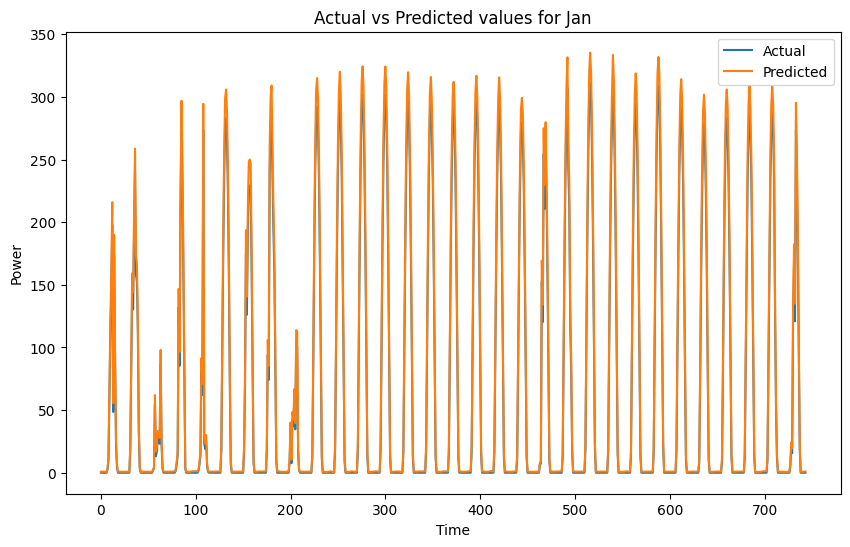

22/22 [==============================] - 0s 3ms/step


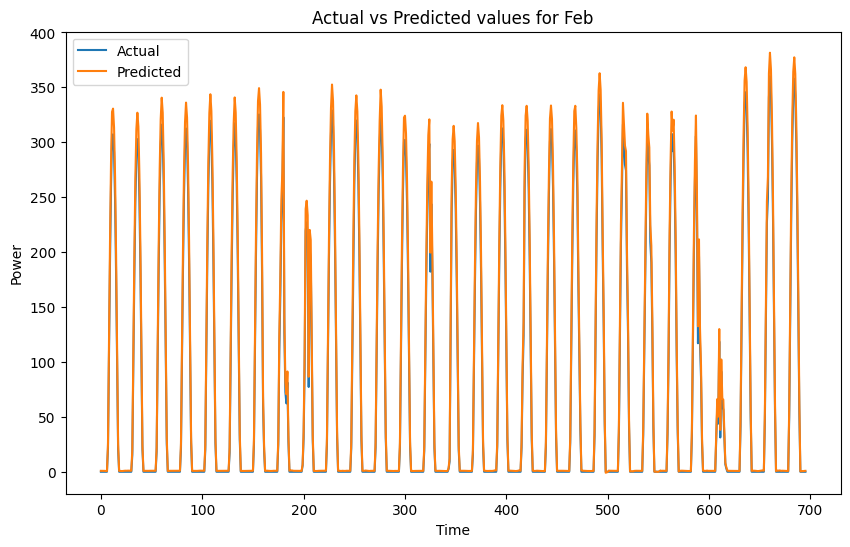

24/24 [==============================] - 0s 3ms/step


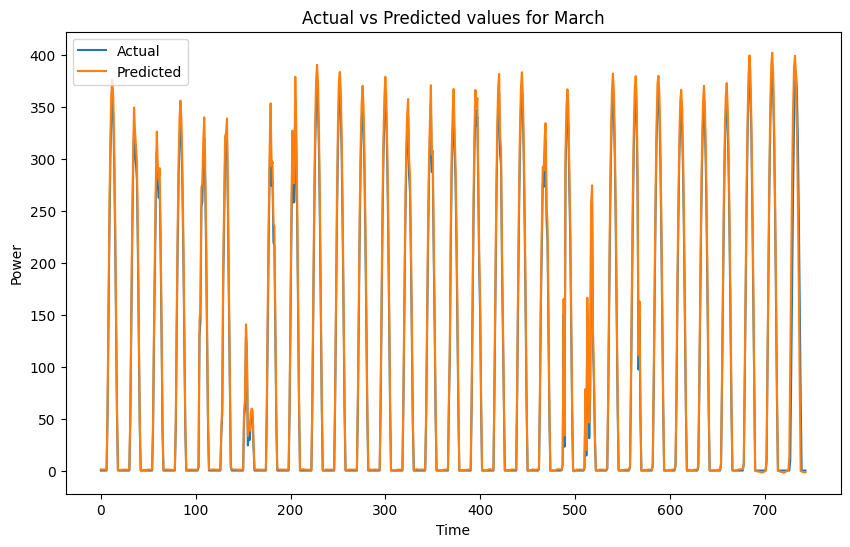

23/23 [==============================] - 0s 2ms/step


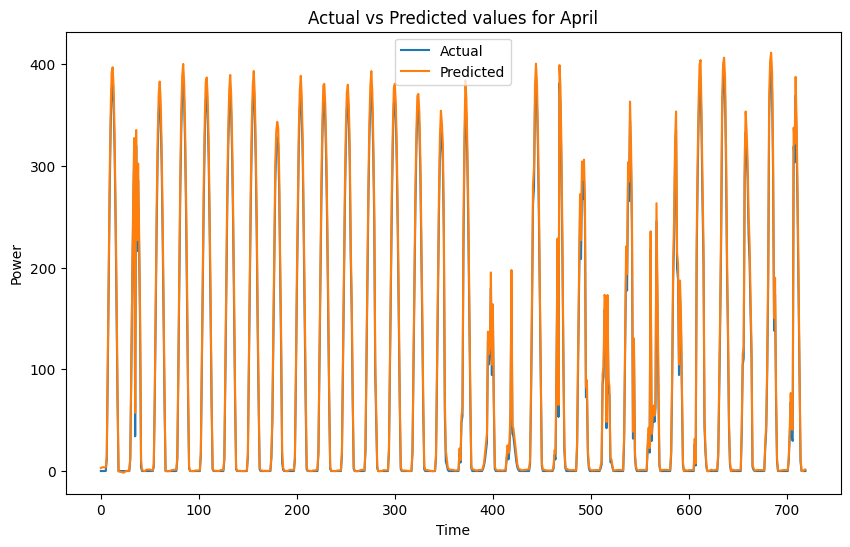

24/24 [==============================] - 0s 2ms/step


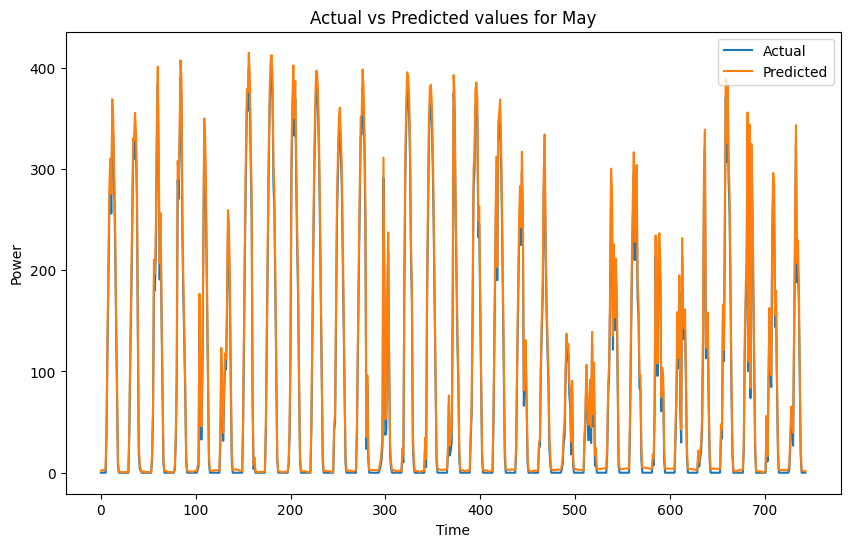

23/23 [==============================] - 0s 2ms/step


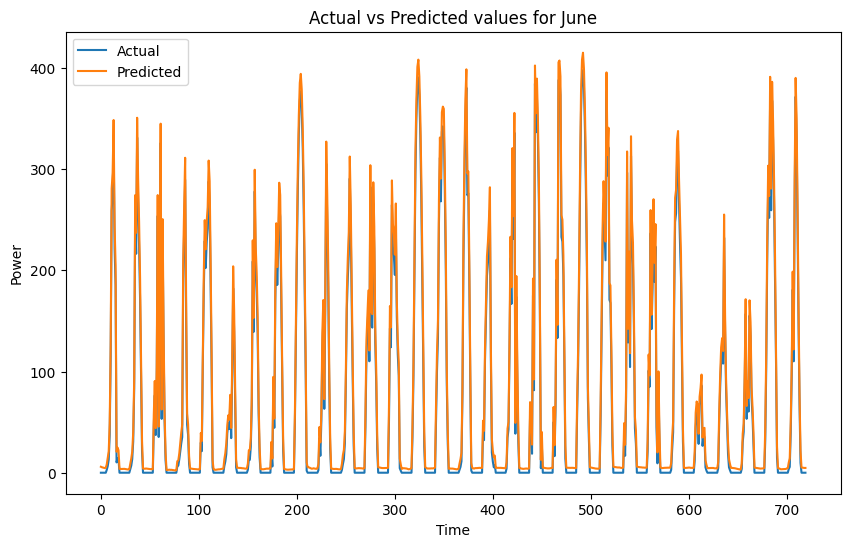

24/24 [==============================] - 0s 2ms/step


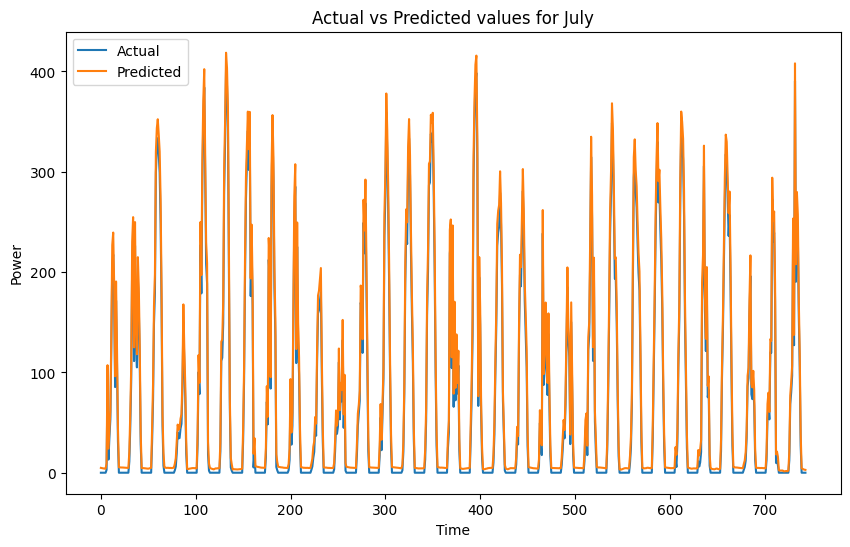

24/24 [==============================] - 0s 2ms/step


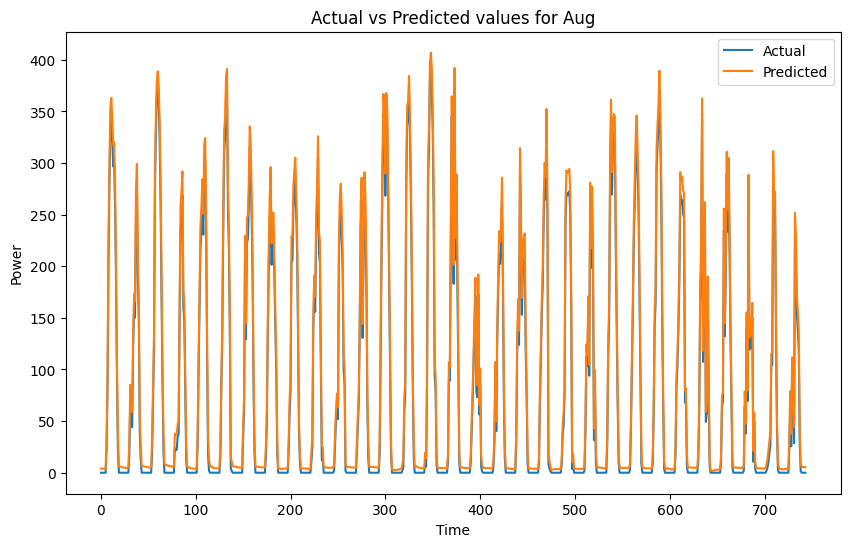

23/23 [==============================] - 0s 3ms/step


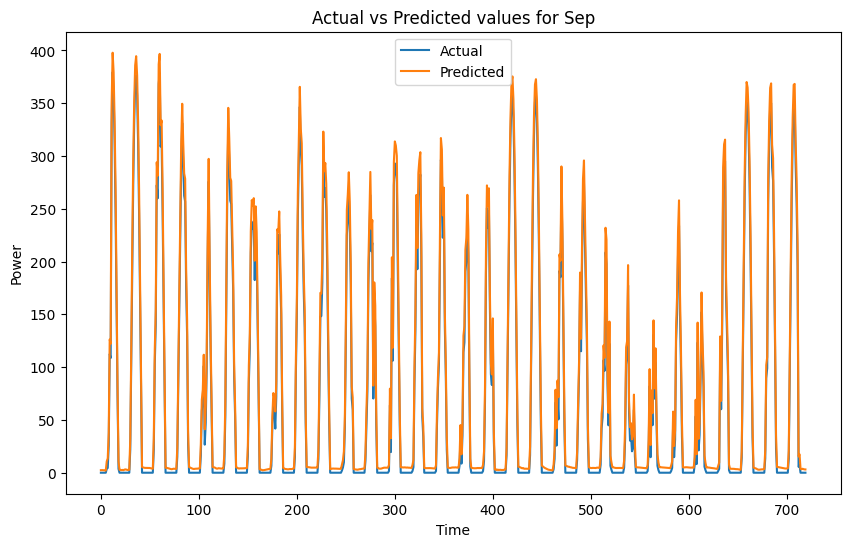

24/24 [==============================] - 0s 2ms/step


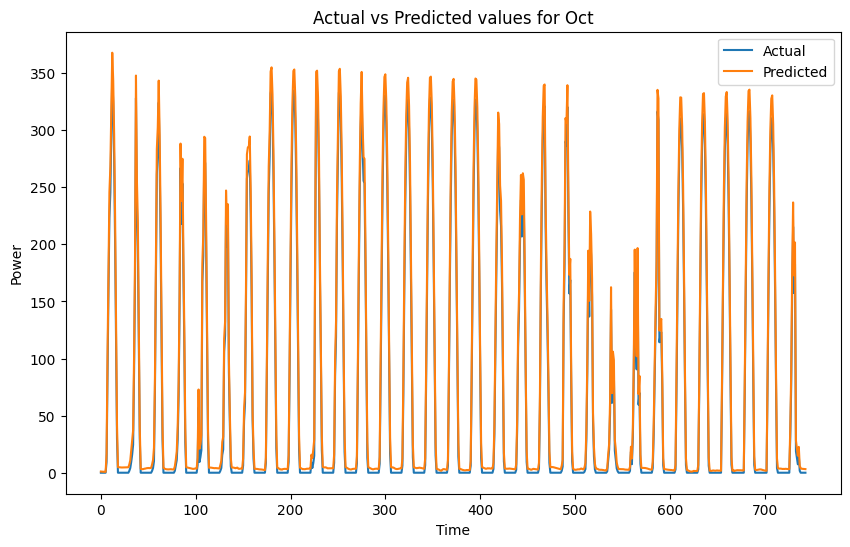

23/23 [==============================] - 0s 2ms/step


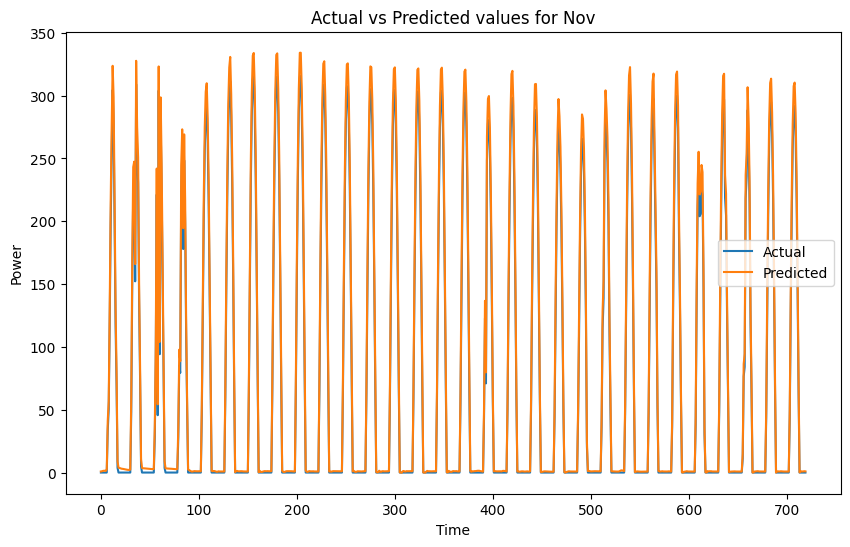

24/24 [==============================] - 0s 2ms/step


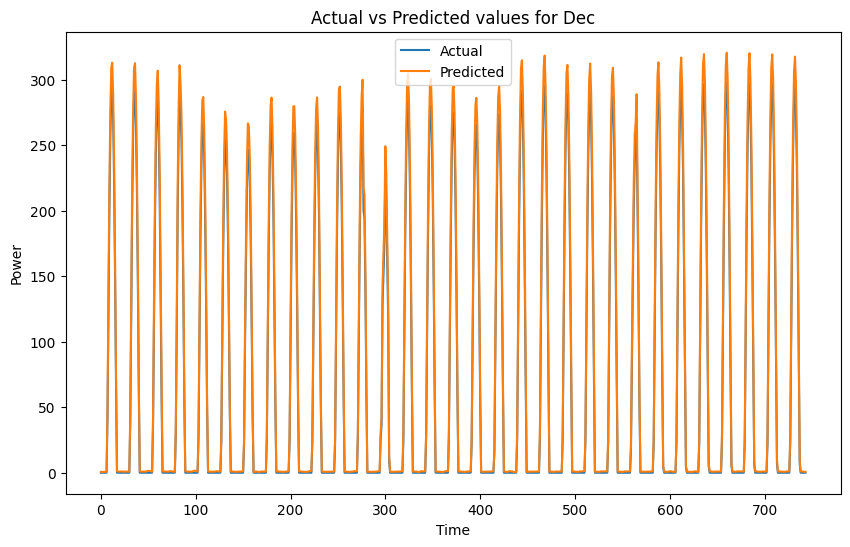

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
for month in months:
    data = pd.read_csv(f'{month}.csv')
    data.drop(['YEAR','Month','Day','Hour','Pressure','Precipitable Water','Wind Direction','Wind Speed'], axis=1,inplace= True)

    transformed_data = transform_data(data, lambdas)

    X_month = transformed_data.iloc[:, :-1].values
    y_month = transformed_data.iloc[:, -1].values

    X_month = scaler.transform(X_month)

    X_month = X_month.reshape((X_month.shape[0], 1, X_month.shape[1]))

    y_pred = model.predict(X_month).flatten()

    plot_predictions(y_month, y_pred, month)